In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head()

,country_name,mortality_rates_2016,GDP_2016
0,Afghanistan,15.1,547.228
1,Angola,23.6,3506.073
2,Albania,13.6,4124.056
3,United Arab Emirates,18.1,38141.847
4,Argentina,14.0,12790.242


In [6]:
df['log_mortality_rates_2016'] = np.log2(df['mortality_rates_2016']) 
df['log_GDP_2016'] = np.log2(df['GDP_2016']) 

In [7]:
df.head()

,country_name,mortality_rates_2016,GDP_2016,log_mortality_rates_2016,log_GDP_2016
0,Afghanistan,15.1,547.228,3.916477,9.095998
1,Angola,23.6,3506.073,4.560715,11.775640
2,Albania,13.6,4124.056,3.765535,12.009848
3,United Arab Emirates,18.1,38141.847,4.177918,15.219087
4,Argentina,14.0,12790.242,3.807355,13.642756


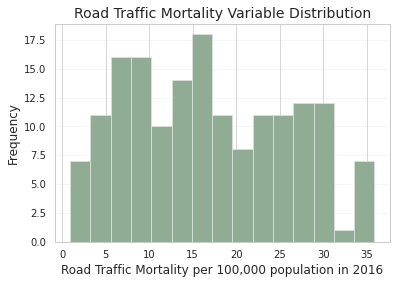

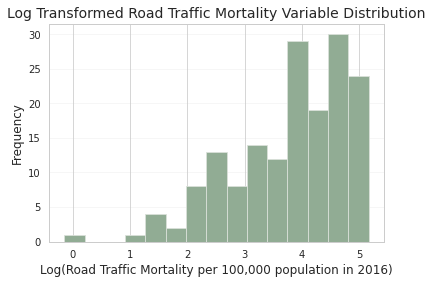

In [99]:
plt.hist(df['mortality_rates_2016'], 
         facecolor='#91ac94', 
         edgecolor='#dae1da', 
         alpha=1,
         bins=15,
        label="histogram")
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Road Traffic Mortality per 100,000 population in 2016',fontsize=12)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.title('Road Traffic Mortality Variable Distribution',fontsize=14)

plt.show()

plt.hist(df['log_mortality_rates_2016'], 
         facecolor='#91ac94', 
         edgecolor='#dae1da', 
         alpha=1,
         bins=15,
        label="histogram")
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Log(Road Traffic Mortality per 100,000 population in 2016)',fontsize=12)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.title('Log Transformed Road Traffic Mortality Variable Distribution',fontsize=14)

plt.show()

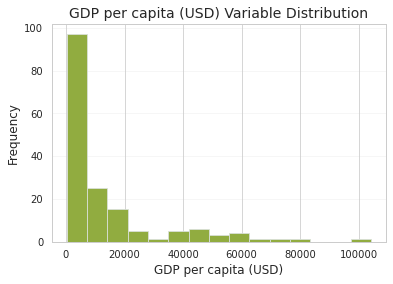

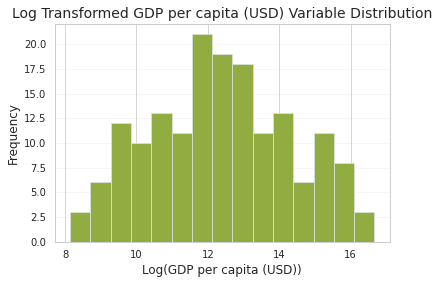

In [102]:
plt.hist(df['GDP_2016'], 
         facecolor='#91ac40', 
         edgecolor='#dae1da', 
         alpha=1,
         bins=15,
        label="histogram")
plt.grid(axis='y', alpha=0.2)
plt.xlabel('GDP per capita (USD)',fontsize=12)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.title('GDP per capita (USD) Variable Distribution',fontsize=14)

plt.show()

plt.hist(df['log_GDP_2016'], 
         facecolor='#91ac40', 
         edgecolor='#dae1da', 
         alpha=1,
         bins=15,
        label="histogram")
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Log(GDP per capita (USD))',fontsize=12)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.title('Log Transformed GDP per capita (USD) Variable Distribution',fontsize=14)

plt.show()

# Checking the skew value and whether we need a log

In [10]:
skewchart = (df["mortality_rates_2016"])
skewchart.skew()

skewchart1 = np.log(df["mortality_rates_2016"])
skewchart1.skew()
print (f"The skew value is {skewchart.skew()}, when logged it is {skewchart1.skew()}.")

The skew value is 0.22535532769945152, when logged it is -0.9650131799691479.


In [11]:
skewchart = (df["GDP_2016"])
skewchart.skew()

skewchart1 = np.log(df["GDP_2016"])
skewchart1.skew()
print (f"The skew value is {skewchart.skew()}, when logged it is {skewchart1.skew()}.")

The skew value is 2.3201837518539072, when logged it is 0.054914188371480536.


A skewed value between -2 and 2 are acceptable to be considered a normal distribution (Hair et al. 2010). Therefore, the original variation distribution of GDP has a skewness value of 2.3 and is log transformed in order to have a value of 0.05. The mortality rates on the other hand have a skewness value of 0.22, which is considered acceptable as it falls between -2 and 2. When it is log transformed it has a value of -0.9, and is therefore, kept in its original distribution. 

Hair, J., Black, W. C., Babin, B. J. & Anderson, R. E. (2010) Multivariate data analysis (7th ed.). Upper Saddle River, New Jersey: Pearson Educational International.

# REGRESSION

In [12]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

x = df[["mortality_rates_2016"]]
y = df[["log_GDP_2016"]]

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_GDP_2016   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           4.73e-27
Time:                        16:37:15   Log-Likelihood:                -288.36
No. Observations:                 165   AIC:                             580.7
Df Residuals:                     163   BIC:                             586.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.9870 

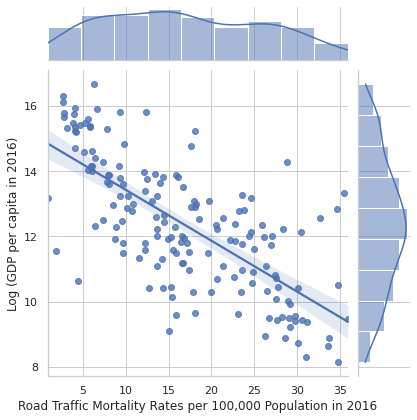

In [57]:
g = sns.jointplot(x="mortality_rates_2016", y="log_GDP_2016", data=df, kind="reg", color = "b");
g.set_axis_labels("Road Traffic Mortality Rates per 100,000 Population in 2016", "Log (GDP per capita in 2016)")

In [55]:
# To know the intercept and gradient

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = df[["mortality_rates_2016"]]
y = df[["log_GDP_2016"]]
regr.fit(x, y)
print(regr.coef_[0])
print(regr.intercept_)

[-0.15601143]
[14.98696997]


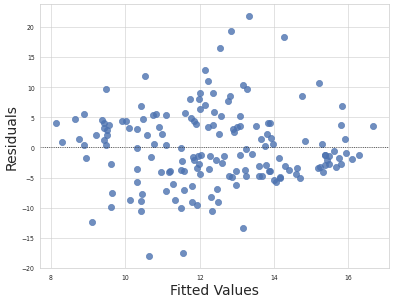

In [98]:
import seaborn
import matplotlib.pyplot as plt
import numpy

plt.figure(figsize=(9, 7), dpi=50)
x = df[["log_GDP_2016"]]
y = df[["mortality_rates_2016"]]

d = seaborn.residplot(x, y, scatter_kws={"s": 80})

d.set_xlabel("Fitted Values",fontsize=20)
d.set_ylabel("Residuals",fontsize=20)

plt.savefig("out.png")